# Project: Investigate Gapminder dataset about quality of life

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I've selected the following datasets for my analysis: 
>
> - Child mortality (0-5 year-olds dying per 1000 born)
> - Children per woman (The number of children that would be born to each woman with prevailing age-specific fertility rates)
> - GDP per capita (Gross domestic product per person adjusted for differences in purchasing power)
> - Life expectancy (The average number of years a newborn child would live if current mortality patterns were to stay the same)
> - Population
>
> All the data was taken from <a href="https://www.gapminder.org/data/">Gapminder</a>.

> I will ask the following questions: 
> 
> - <a href="#q1">Is the world getting better off than a century ago? </a>
> - <a href="#q2">What is happening with child mortality over time?</a>
> - <a href="#q3">Are women having more or less children with time?</a>
> - <a href="#q4">What is happening with population over time?</a>
> - <a href="#q5">What is happening with GDP per capita over time?</a>
> - <a href="#q6">What is happening with life expectancy over time?</a>
> - <a href="#q7">Does higher GDP per capita lead to lower child mortality?</a>
> - <a href="#q8">Does higher GDP per capita lead to higher life expectancy?</a>
> - <a href="#q9">Does higher GDP per capita lead to less children per woman?</a>
> - <a href="#q10">Does lower children per woman lead to lower child mortality?</a>
> - <a href="#q11">Does the wealthiest country have less children dying than the poorest country? What about the country that's in the middle in wealth?</a></li>

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

First I'll import the dataframes and save them in variables with names that correspond to what they are. I'll also set the first column as the index column, because it has the countries names.

In [2]:
child_mortality = pd.read_csv('child_mortality.csv', index_col=0)
children_per_woman = pd.read_csv('children_per_woman.csv', index_col=0)
gdp_per_capita = pd.read_csv('income_per_person.csv', index_col=0)
life_expectancy = pd.read_csv('life_expectancy_years.csv', index_col=0)
population = pd.read_csv('population.csv', index_col=0)

I'll now check the head of each dataframe to get an idea of how it looks like. I'll also have to check for NaN values and either replace them with the mean value of each column, or drop those columns. I'll have to see as well if there are any duplicated rows, and drop them if they exist.

In [3]:
child_mortality.head(2)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,469.0,469.0,469.0,469.0,469.0,469.0,470.0,470.0,470.0,470.0,...,12.60,12.4,12.20,12.00,11.80,11.60,11.50,11.30,11.10,11.10
Albania,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,...,2.32,2.3,2.27,2.24,2.22,2.19,2.16,2.14,2.11,2.11


In [4]:
children_per_woman.head(2)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74
Albania,4.6,4.6,4.6,4.6,4.6,4.6,4.6,4.6,4.6,4.6,...,1.78,1.78,1.78,1.79,1.79,1.79,1.79,1.79,1.79,1.79


In [5]:
gdp_per_capita.head(2)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,603,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
Albania,667,667,667,667,667,668,668,668,668,668,...,19400,19800,20200,20600,21000,21500,21900,22300,22800,23300


In [6]:
life_expectancy.head(2)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,28.1,...,76.5,76.6,76.7,76.9,77.0,77.1,77.3,77.4,77.5,77.7
Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.1,88.2,88.3


In [7]:
population.head(2)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,76600000,76400000,76300000,76100000,76000000,75800000,75600000,75400000,75200000,74900000
Albania,400000,402000,404000,405000,407000,409000,411000,413000,414000,416000,...,1330000,1300000,1270000,1250000,1220000,1190000,1170000,1140000,1110000,1090000


### Data Cleaning

I only want to analyze values from 1900 to 2014, so I'll drop all the values before 1900 and after 2014. I'm not using data up to 2021 (the year at the time of writing this) because the data was collected all the dataframes at least until 2014, and in some of them it was forecasted after that. I only want to work with accurate data. 

In [8]:
# drop all the columns from 1800 to 1899.

child_mortality.drop(child_mortality.loc[:, :'1899'].columns , axis=1, inplace = True)
children_per_woman.drop(children_per_woman.loc[:, :'1899'].columns , axis=1, inplace = True)
gdp_per_capita.drop(gdp_per_capita.loc[:, :'1899'].columns , axis=1, inplace = True)
life_expectancy.drop(life_expectancy.loc[:, :'1899'].columns , axis=1, inplace = True)
population.drop(population.loc[:, :'1899'].columns , axis=1, inplace = True)


In [9]:
# drop all the columns after 2014.

child_mortality.drop(child_mortality.loc[:, '2015':].columns , axis=1, inplace = True)
children_per_woman.drop(children_per_woman.loc[:, '2015':].columns , axis=1, inplace = True)
gdp_per_capita.drop(gdp_per_capita.loc[:, '2015':].columns , axis=1, inplace = True)
life_expectancy.drop(life_expectancy.loc[:, '2015':].columns , axis=1, inplace = True)
population.drop(population.loc[:, '2015':].columns , axis=1, inplace = True)

Set the column values to ints instead of strings. This will make it easier to work with the graphs afterwards. 

In [10]:
child_mortality.columns = child_mortality.columns.astype(int) 
children_per_woman.columns = children_per_woman.columns.astype(int) 
gdp_per_capita.columns = gdp_per_capita.columns.astype(int) 
life_expectancy.columns = life_expectancy.columns.astype(int) 
population.columns = population.columns.astype(int) 

Check data for NaN values in each dataframe. If the NaN values are not abundant, replace them with the mean value of each column.

In [11]:
child_mortality.isnull().any(axis=1).value_counts()

False    184
True      11
dtype: int64

In child_mortality, from the 195 rows, 11 contain NaN values. I'll fill them with the mean of each column. 

In [12]:
child_mortality.fillna(child_mortality.mean(), inplace=True)

In [13]:
# check that there are no NaN values

child_mortality.isnull().any(axis=1).value_counts()

False    195
dtype: int64

In [14]:
children_per_woman.isnull().any(axis=1).value_counts()

False    184
dtype: int64

children_per_woman has no NaN values.

In [15]:
gdp_per_capita.isnull().any(axis=1).value_counts()

False    193
dtype: int64

gdp_per_capita has no NaN values.

In [16]:
life_expectancy.isnull().any(axis=1).value_counts()

False    184
True       3
dtype: int64

In life_expectancy, from the 195 rows, 3 contain NaN values. I'll fill them with the mean of each column. 

In [17]:
life_expectancy.fillna(life_expectancy.mean(), inplace=True)

In [18]:
# check that there are no NaN values

life_expectancy.isnull().any(axis=1).value_counts()

False    187
dtype: int64

In [19]:
population.isnull().any(axis=1).value_counts()

False    195
dtype: int64

population has no NaN values.

In [20]:
# see if there are any duplicated rows

sum(child_mortality.duplicated())

0

In [21]:
sum(children_per_woman.duplicated())

0

In [22]:
sum(gdp_per_capita.duplicated())

0

In [23]:
sum(life_expectancy.duplicated())

0

In [24]:
sum(population.duplicated())

0

None of the dataframes has duplicated rows, so there is nothing to clean there. 

The data is now clean and ready to be analysed.  

<a id='eda'></a>
## Exploratory Data Analysis
<a id='q1'></a>
### 1) Is the world getting better off than a century ago? 

To try and answer the question, I'll first analize some indicators against time, and then I'll analyze two indicators together against time. 

I'll pose some sub-questions to have more clear conclusions.

<a id='q2'></a>
#### a) What is happening with child mortality over time?

I'll make a line plot of the average values of child mortality of each year in the whole world against the year.

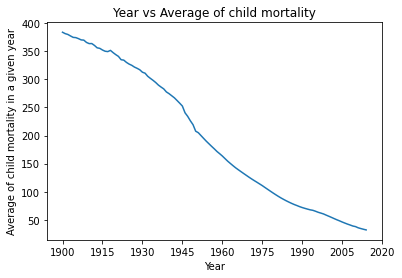

In [25]:
child_mortality.mean().plot(xticks = np.arange(1900, 2021, 15))
plt.title('Year vs Average of child mortality')
plt.xlabel('Year')
plt.ylabel('Average of child mortality in a given year');

We can see that there is a strong negative correlation between child mortality and time. This means that as time increases, child mortality decreases. Let's see if something else could be related.

<a id='q3'></a>
#### b) Are women having more or less children with time?

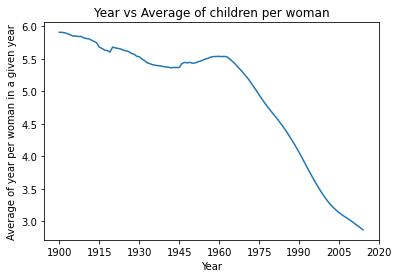

In [26]:
children_per_woman.mean().plot(xticks = np.arange(1900, 2021, 15))
plt.title('Year vs Average of children per woman')
plt.xlabel('Year')
plt.ylabel('Average of year per woman in a given year');

We can see that each woman is having less children than before. Again, it's negatively correlated. Let's see a graph of the population against time.

<a id='q4'></a>
#### c) What is happening with population over time?

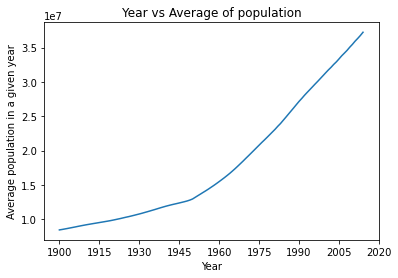

In [27]:
population.mean().plot(xticks = np.arange(1900, 2021, 15))
plt.title('Year vs Average of population')
plt.xlabel('Year')
plt.ylabel('Average population in a given year');

We can see that population is growing and there are less children under the age of 5 dying. Let's see if it has something to do with the GDP per capita. 

<a id='q5'></a>
#### d) What is happening with GDP per capita over time?

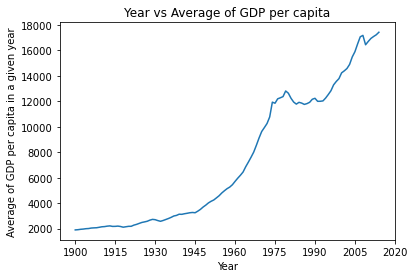

In [28]:
gdp_per_capita.mean().plot(xticks = np.arange(1900, 2021, 15))
plt.title('Year vs Average of GDP per capita')
plt.xlabel('Year')
plt.ylabel('Average of GDP per capita in a given year');

GDP per capita has been growing over time, so there is correlation between how wealthy people is and how many children are dying. Also there is correlation between how wealthy people is, and women having less children.

<a id='q6'></a>
#### e) What is happening with life expectancy over time?

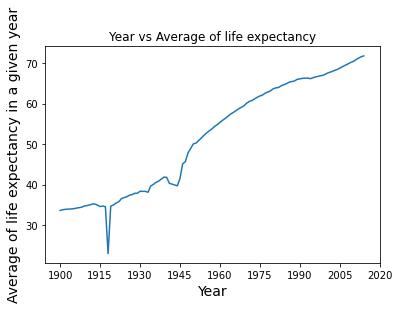

In [29]:
life_expectancy.mean().plot(xticks = np.arange(1900, 2021, 15))
plt.title('Year vs Average of life expectancy')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average of life expectancy in a given year', fontsize=14);

In the year vs average of life expectancy we can see that it's overall growing, but there was a a very steep decay and then recovery at around 1917-1918. The graph makes sense with what we know of world history, because that was the ending of the WWI and the start of the Spanish Flu. There is also some decay at around WWII. 

We can make the following conclusions from the graphs that we saw:

- Child mortality is strongly correlated with time. As time increases, child mortality decreases.
- The average children than woman are having is correlated with time. As time increases, the average children than woman are having decreases. 
- Population is strongly positively correlated with time. As time increases, population increases as well.
- GDP per capita is strongly positively correlated with time. As time increases, GDP per capita increases as well. This means that people is wealthier.
- Life expectancy is strongly positively correlated with time. As time increases, life expectancy increases as well.

We could say tentatively that, by looking at a few indicators, people seem to be getting better off.

Let's now compare several indicators on the same graph vs year. 

<a id='q7'></a>
#### f) Does higher GDP per capita lead to lower child mortality?

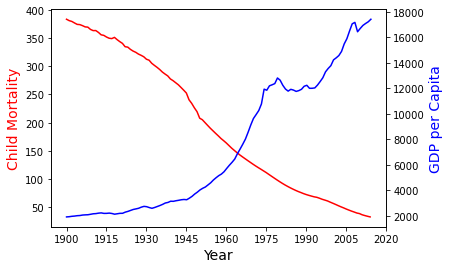

In [30]:
fig, ax = plt.subplots()
ax.plot(child_mortality.columns, child_mortality.mean(), color='red')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Child Mortality', color='red', fontsize=14)

ax2 = ax.twinx()
ax2.plot(gdp_per_capita.columns, gdp_per_capita.mean(), color='blue')
ax2.set_ylabel('GDP per Capita', color='blue', fontsize=14)

ax.set_xticks(np.arange(1900, 2021, 15));

There seems to be a very strong negative correlation between child mortality and gdp per capita, but a correlation is not enough to say that higher GDP per capita leads to lower child mortality.

<a id='q8'></a>
#### g) Does higher GDP per capita lead to higher life expectancy?

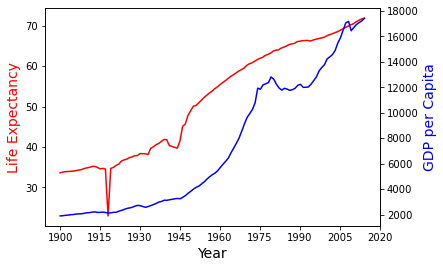

In [31]:
fig, ax = plt.subplots()
ax.plot(life_expectancy.columns, life_expectancy.mean(), color='red')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Life Expectancy', color='red', fontsize=14)

ax2 = ax.twinx()
ax2.plot(gdp_per_capita.columns, gdp_per_capita.mean(), color='blue')
ax2.set_ylabel('GDP per Capita', color='blue', fontsize=14)

ax.set_xticks(np.arange(1900, 2021, 15));

There also seems to be a strong positive correlation between life expectancy and gdp per capita, but again, a correlation is not enough to say that higher GDP per capita leads to higher life expectancy.

<a id='q9'></a>
#### h) Does higher GDP per capita lead to less children per woman?

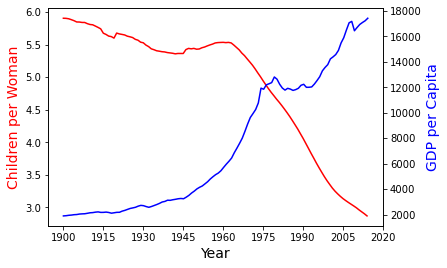

In [32]:
fig, ax = plt.subplots()
ax.plot(children_per_woman.columns, children_per_woman.mean(), color='red')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Children per Woman', color='red', fontsize=14)

ax2 = ax.twinx()
ax2.plot(gdp_per_capita.columns, gdp_per_capita.mean(), color='blue')
ax2.set_ylabel('GDP per Capita', color='blue', fontsize=14)

ax.set_xticks(np.arange(1900, 2021, 15));

There is a very strong negative correlation between children per woman and gdp per capita, but a correlation is still not enough to say that higher GDP per capita leads to women having less children.

<a id='q10'></a>
#### i) Does lower children per woman lead to lower child mortality?

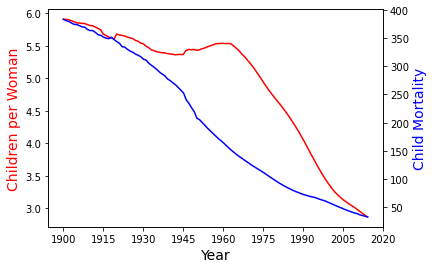

In [33]:
fig, ax = plt.subplots()
ax.plot(children_per_woman.columns, children_per_woman.mean(), color='red')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Children per Woman', color='red', fontsize=14)

ax2 = ax.twinx()
ax2.plot(child_mortality.columns, child_mortality.mean(), color='blue')
ax2.set_ylabel('Child Mortality', color='blue', fontsize=14)

ax.set_xticks(np.arange(1900, 2021, 15));

There is also a very strong positive correlation between children per woman and child mortality, both decreasing quite steadily over time. It doesn't mean, once again, that the fact that women are having less children leads to lower child mortality.

All of the previous analysis were done with each year's average, so we can't really infer things for any particular country, but we can make world inferences. We can infer the following things: 

- Child mortality is strongly correlated with GDP per capita. As GDP per capita increases, child mortality decreases.
- Life expectancy is strongly correlated with GDP per capita. As GDP per capita increases, life expectancy increases as well.
- Children per woman is strongly correlated with GDP per capita. As GDP per capita increases, children per woman decreases.
- Children per woman is strongly correlated with child mortality. As children per woman, child mortality decreases as well.

These are correlations only, for which we cannot infer causation.

Let's try now to see what's happening in particular countries. 

First I'll transpose the data so I can make different graphs and comparisons with it. Now I want my indexes to be years, and my columns to be countries.

In [34]:
# _t stands for transposed

child_mortality_t = child_mortality.T
children_per_woman_t = children_per_woman.T
gdp_per_capita_t = gdp_per_capita.T
life_expectancy_t = life_expectancy.T
population_t = population.T

In [35]:
# this is how the transposed data looks like

child_mortality_t.head(2)

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1900,482.0,374.0,459.0,383.923913,485.0,210.0,358.0,326.0,149.0,375.0,...,225.0,232.0,405.0,379.0,243.0,414.0,417.0,539.0,409.0,395.0
1901,481.0,374.0,459.0,381.448370,484.0,209.0,351.0,322.0,157.0,340.0,...,216.0,228.0,405.0,376.0,242.0,414.0,416.0,539.0,409.0,395.0


Now  I'll create a new column with the decade of any particular year. The decade of 1992 and 1995, for instance, is 1990.

In [36]:
child_mortality_t['decades'] = [(x//10)*10 for x in child_mortality_t.index]
children_per_woman_t['decades'] = [(x//10)*10 for x in children_per_woman_t.index]
gdp_per_capita_t['decades'] = [(x//10)*10 for x in gdp_per_capita_t.index]
life_expectancy_t['decades'] = [(x//10)*10 for x in life_expectancy_t.index]
population_t['decades'] = [(x//10)*10 for x in population_t.index]

This is how my data would look like if I were to group it by decades and calculate the mean of each country in each decade. I will use this means for some graphs later on.

In [37]:
child_mortality_t.groupby('decades').mean()

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
decades,,,,,,,,,,,,,,,,,,,,,
1900,479.90,372.20,456.60,375.038750,481.90,202.800,307.70,308.80,131.600,346.600,...,193.100,216.700,402.800,364.80,237.30,411.60,414.20,536.10,406.60,392.80
1910,471.40,364.70,447.30,355.052500,472.00,187.000,214.10,274.00,93.750,306.100,...,154.700,187.400,296.800,334.10,224.30,403.50,405.50,525.30,398.50,384.70
1920,461.40,355.90,429.60,329.571087,460.60,172.400,180.80,243.00,76.280,212.200,...,111.610,131.650,155.800,306.10,212.00,321.70,395.50,512.50,388.50,375.50
1930,447.00,331.70,380.40,296.073207,431.00,156.000,143.80,202.60,54.410,133.570,...,83.550,76.380,141.100,267.90,201.50,235.10,354.70,489.60,372.40,356.50
1940,427.00,297.30,315.00,250.574076,370.00,137.700,112.42,154.60,42.350,107.090,...,59.120,49.780,94.220,217.50,191.50,163.00,217.20,455.10,324.80,267.40
1950,391.30,235.20,246.80,56.930000,322.60,109.410,85.63,124.70,28.440,54.690,...,30.880,33.700,61.400,183.30,172.40,98.78,128.20,429.40,229.10,172.80
1960,332.30,157.60,244.90,29.790000,292.30,67.550,63.72,104.49,22.890,34.480,...,23.900,27.270,58.730,157.30,134.00,70.81,88.29,385.20,193.00,132.50
1970,277.20,106.54,205.60,21.010000,254.80,50.560,62.29,86.74,17.720,23.640,...,18.190,19.320,52.360,133.20,90.43,54.18,76.41,275.10,162.70,112.70
1980,214.70,58.73,89.35,14.350000,228.50,37.970,33.19,64.18,11.411,13.008,...,11.768,13.050,30.000,90.91,51.18,36.92,61.53,162.60,168.20,88.01


<a id='q11'></a>
### 2) Does the wealthiest country have less children dying than the poorest country? What about the country that's in the middle in wealth?

To find that out, first I'll find which country had the highest GDP per capita (in 2014), which country had the lowest and which country was in the middle.

In [38]:
gdp_per_capita[2014].describe()

count       193.000000
mean      17427.777202
std       18949.791996
min         621.000000
25%        3560.000000
50%       10900.000000
75%       24400.000000
max      117000.000000
Name: 2014, dtype: float64

To understand this values visually, I'll make a boxplot of the GDP per capita.

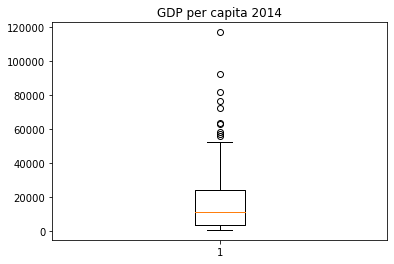

In [50]:
fig, ax = plt.subplots()
ax.set_title('GDP per capita 2014')
ax.boxplot(gdp_per_capita[2014]);

Like we can see, we'll analize the highest outlier, the lowest value (that is not an outlier) and the middle value (that can me recognised by the orange line).

That gives us all the values that we need. Min is the lowest value, max is the highest one and 50% is the middle value. Let's get this values separately.

In [39]:
# minimum value

gdp_per_capita[2014].min()

621

In [40]:
# maximum value

gdp_per_capita[2014].max()

117000

In [41]:
# middle value

gdp_per_capita[2014].median()

10900.0

In [42]:
gdp_per_capita[gdp_per_capita[2014] == 621] 

,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
country,,,,,,,,,,,,,,,,,,,,,
Somalia,763,764,765,765,766,767,768,768,769,770,...,616,615,615,615,615,614,614,616,619,621


In [43]:
gdp_per_capita[gdp_per_capita[2014] == 117000] 

,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
country,,,,,,,,,,,,,,,,,,,,,
Qatar,2200,2230,2270,2300,2330,2370,2400,2440,2470,2510,...,110000,117000,116000,116000,113000,120000,124000,120000,118000,117000


In [44]:
gdp_per_capita[gdp_per_capita[2014] == 10900.0] 

,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
country,,,,,,,,,,,,,,,,,,,,,
Ecuador,1270,1300,1320,1350,1380,1400,1430,1460,1500,1550,...,8550,8780,8820,9230,9130,9310,9880,10300,10600,10900
Paraguay,2280,2310,2340,2370,2400,2430,2460,2490,2520,2550,...,8020,8280,8610,9030,8880,9740,10000,9830,10500,10900


Then the countries are as follows:

- Somalia is the poorest country.
- Qatar is the wealthiest country.
- Ecuador and Paraguay are the countries that are in the middle.

Let's see if GDP per capita and child mortality are still correlated in our chosen countries.

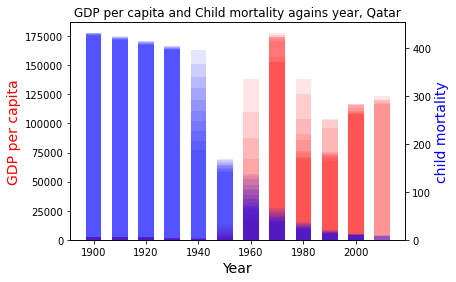

In [52]:
fig, ax = plt.subplots()
ax.bar(gdp_per_capita_t.decades, gdp_per_capita_t['Qatar'], color='red', width=6, alpha=0.1)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('GDP per capita', color='red', fontsize=14)
ax.set_title('GDP per capita and Child mortality agains year, Qatar')

ax2 = ax.twinx()
ax2.bar(child_mortality_t.decades, child_mortality_t['Qatar'], color='blue', width=6, alpha=0.1)
ax2.set_ylabel('child mortality', color='blue', fontsize=14);

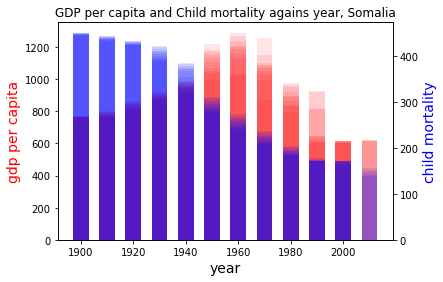

In [53]:
fig, ax = plt.subplots()
ax.bar(gdp_per_capita_t.decades, gdp_per_capita_t['Somalia'], color='red', width=6, alpha=0.1)
ax.set_xlabel('year', fontsize=14)
ax.set_ylabel('gdp per capita', color='red', fontsize=14)
ax.set_title('GDP per capita and Child mortality agains year, Somalia')

ax2 = ax.twinx()
ax2.bar(child_mortality_t.decades, child_mortality_t['Somalia'], color='blue', width=6, alpha=0.1)
ax2.set_ylabel('child mortality', color='blue', fontsize=14);

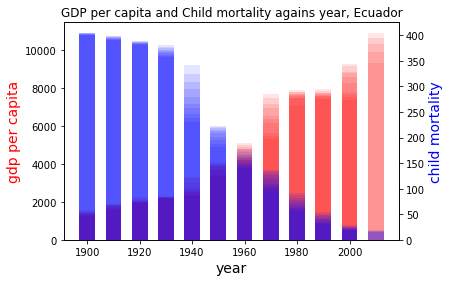

In [54]:
fig, ax = plt.subplots()
ax.bar(gdp_per_capita_t.decades, gdp_per_capita_t['Ecuador'], color='red', width=6, alpha=0.1)
ax.set_xlabel('year', fontsize=14)
ax.set_ylabel('gdp per capita', color='red', fontsize=14)
ax.set_title('GDP per capita and Child mortality agains year, Ecuador')

ax2 = ax.twinx()
ax2.bar(child_mortality_t.decades, child_mortality_t['Ecuador'], color='blue', width=6, alpha=0.1)
ax2.set_ylabel('child mortality', color='blue', fontsize=14);

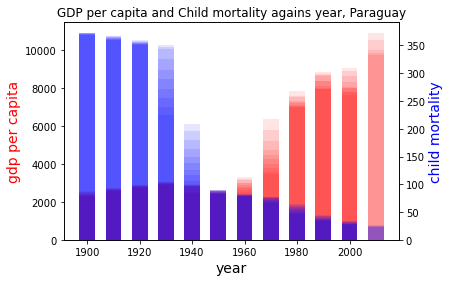

In [55]:
fig, ax = plt.subplots()
ax.bar(gdp_per_capita_t.decades, gdp_per_capita_t['Paraguay'], color='red', width=6, alpha=0.1)
ax.set_xlabel('year', fontsize=14)
ax.set_ylabel('gdp per capita', color='red', fontsize=14)
ax.set_title('GDP per capita and Child mortality agains year, Paraguay')

ax2 = ax.twinx()
ax2.bar(child_mortality_t.decades, child_mortality_t['Paraguay'], color='blue', width=6, alpha=0.1)
ax2.set_ylabel('child mortality', color='blue', fontsize=14);

Qatar, Paraguay and Ecuador have a very strong correlation between GDP per capita, or wealth, and a reduction in child mortality. Somalia, on the other hand, has a somewhat steady graph, with no clear correlation between those two variables. Child mortality was reduced a bit, but not as much as in the other cases, and GDP per capita also decreased in the last decades.

<a id='limitations'></a>
## Limitations

Most of the questions posed here asked if something could lead to something else. Unfortunately, this analysis cannot reply to those questions. The data and the analysis methods that were used are only enough to find correlations, and make hypothesis about causation. But none of the results found here imply any kind of causation, they only suggest it. 

Other than that, the data was mostly clean when downloaded, and it is very representative. 

<a id='conclusions'></a>
## Conclusions

Answering the first question, the world seems to be getting better off than a century ago. Child mortality decreased a lot overall, the GDP per capita increased a lot and life expectancy increased as well. 

We saw that GDP per capita is strongly correlated with child mortality, life expectancy and children per woman, which might imply that countries are doing better because they are wealthier, or both variables might be affected by some other variable. 

To answer the second question, the poorest country (Somalia) does seem to have a lot more children dying than the wealthiest country, and the countries with a middle wealth. 

